# Choose tutors

## Choose proper tutors for math exam

### https://www.kaggle.com/c/choose-tutors

## Overview

### Description
In this competition your task will be to predict if a tutor is a proper one for preparing for the math exam. You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).

Ваша задача этом соревновании - предсказать, подойдет ли репетитор для подготовки к экзамену по математике. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

### Evaluation

The evaluation metric is ROC AUC

Метрика для оценки – ROC AUC

## Rules

You can only use these imports:

import numpy as np <br>
import pandas as pd <br>
from sklearn.model_selection import train_test_split <br>
import matplotlib.pyplot as plt <br>
import seaborn as sns <br>

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
train = pd.read_csv('train.csv', index_col=0, encoding='utf-8')
test = pd.read_csv('test.csv', index_col=0, encoding='utf-8')

In [3]:
train.head(2)

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
Id,,,,,,,,,,,,
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  float64
 11  choose               10000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1015.6 KB


In [5]:
train.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


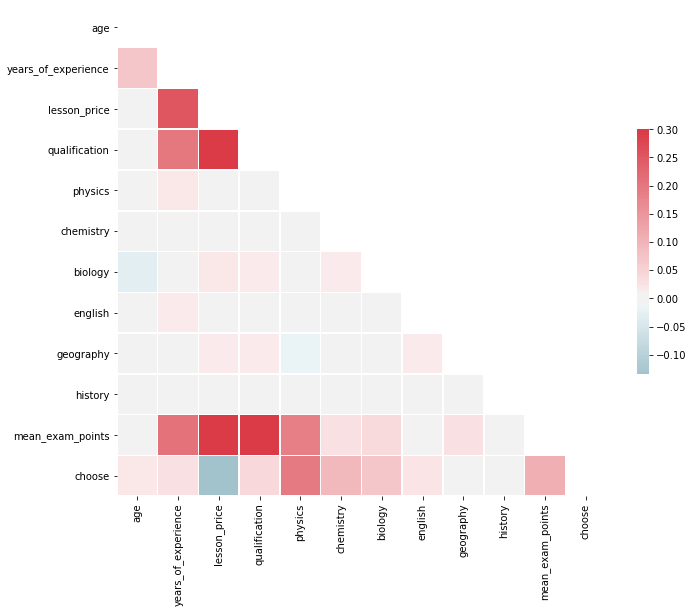

In [6]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

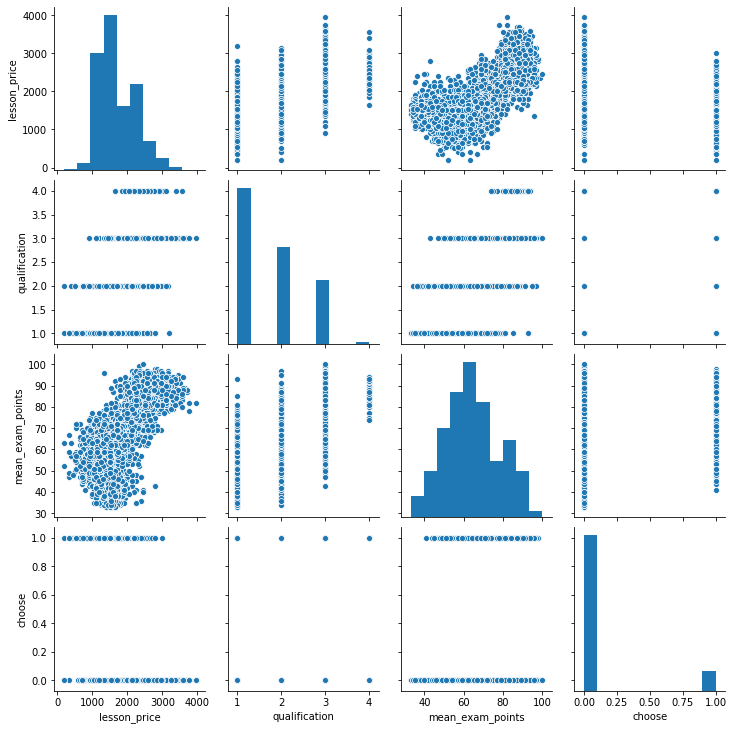

In [7]:
sns.pairplot(train.loc[:, ['lesson_price', 'qualification', 'mean_exam_points', 'choose']]);

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_logloss(y, y_pred):
    y_pred = np.array(list(map(lambda x: 1e-10 if x == 0 else (1 - 1e-10) if x == 1 else x, y_pred)))
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

def logreg_eval_model(X, y, iterations=100, alpha=1e-4, penalty='l2', verbose=False, random_state=42):
    np.random.seed(random_state)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        z = np.dot(W, X.T)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        if penalty == 'l1':
            regularization = W / np.abs(W)
        elif penalty == 'l2':
            regularization = W
        else:
            regularization = 0
            
        W -= alpha * (1 / n * np.dot((y_pred - y), X)) + regularization
        
        if verbose:
            if i % (iterations / 10) == 0:
                print(f'итерация: {i}, logloss: {np.round(err, 4)}, веса: {W}')
            
    return W, err

def calc_pred_proba(W, X):
    y_pred_proba = 1 / (1 + np.exp(-np.dot(W, X.T)))
    return y_pred_proba

def calc_pred(W, X, threshold=0.5):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.array([1 if proba >= threshold else 0 for proba in y_pred_proba], dtype = np.int32)
    return y_pred

def optimize(func, X, y, iterations, alphas, penalty='l1', verbose=False, random_state=42):
    grid = {}
    for iteration in iterations:
        for alpha in alphas:
            W, err = func(X, y, iterations=iteration, alpha=alpha, penalty=penalty, verbose=verbose, random_state=random_state)
            grid[(iteration, alpha)] = err
    result = sorted(grid.items(), key=lambda x: x[1])[0]
    best_iter, best_alpha = result[0]
    best_err = result[1]
    return best_iter, best_alpha, best_err

In [9]:
class CustomStandardScaler:
        
    def _calc_mean(self, x):
        return x.mean(axis=0)
    
    def _calc_std(self, x):
        return x.std(axis=0)
    
    def _set_mean(self, mean):
        self._mean = mean
    
    def _get_mean(self):
        return self._mean
    
    def _set_std(self, std):
        self._std = std
        
    def _get_std(self):
        return self._std
    
    def fit(self, x):
        self._set_mean(self._calc_mean(x))
        self._set_std(self._calc_std(x))
    
    def transform(self, x):
        return (x - self._get_mean()) / self._get_std()
    
    def fit_transform(self, x):
        self.fit(x)
        x_transformed = self.transform(x)
        return x_transformed

In [10]:
columns = ['lesson_price', 'qualification', 'mean_exam_points',]

X = train.loc[:, columns].values
y = train['choose'].values

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
scaler = CustomStandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [13]:
iterations, alphas = np.arange(100, 201, 100), np.linspace(0.01, 1.0, 10)

best_iter, best_alpha, best_err = optimize(logreg_eval_model, X_train_std, y_train, iterations, alphas)

print(f'best # of iterations: {best_iter}, best alpha: {best_alpha}, log_loss: {best_err}')

best # of iterations: 200, best alpha: 0.67, log_loss: 0.691380704314073


In [14]:
W, _ = logreg_eval_model(X_train_std, y_train, best_iter, best_alpha)

In [15]:
y_train_hat = calc_pred_proba(W, X_train_std)
y_valid_hat = calc_pred_proba(W, X_valid_std)

In [16]:
print(f'Train logloss: {calc_logloss(y_train, y_train_hat)}')
print(f'Valid logloss: {calc_logloss(y_valid, y_valid_hat)}')

Train logloss: 0.6911847256306177
Valid logloss: 0.6912345634444352


In [17]:
X_std = scaler.fit_transform(X)

In [18]:
W, _ = logreg_eval_model(X_std, y, best_iter, best_alpha)

In [19]:
y_hat = calc_pred_proba(W, X_std)

In [20]:
print(f'Total logloss: {calc_logloss(y, y_hat)}')

Total logloss: 0.691182395358404


In [21]:
X_test = test.loc[:, columns].values

In [22]:
X_test_std = scaler.transform(X_test)

In [23]:
y_test_hat = calc_pred_proba(W, X_test_std)

In [24]:
submission = pd.DataFrame({'Id': test.index, 'choose': y_test_hat})

In [25]:
submission.to_csv('submission.csv', index=False, sep=',', encoding='utf-8')